## Abonnieren (Subscriben) von Topics

Variante A) Jeder Messwert wird über ein eignes Topic abonniert

In [ ]:
import paho.mqtt.client as mqtt
from datetime import datetime as dt
import json

DefaultBroker = "broker"
DefaultPort = 1883
DefaultTopic = "hcbcDemo/monitoring/UdK/VPT/ROF/TFW/Br-oLoS" #Br-oLiB, CaS-mLiB, Pl-iLiS, Pl-iLoB


def on_message(client, userdata, message):
    print("message topic=",message.topic)
    print("message received ",str(message.payload.decode("utf-8")))
    print("message qos=",message.qos)
    print("message retain flag=",message.retain)

client = mqtt.Client()
client.on_message = on_message

client.connect(DefaultBroker,DefaultPort)
client.subscribe(DefaultTopic)

if __name__ == "__main__":
    client.loop_forever()

## Schreiben des abonnierten Topics in eine Datei

Variante B): Alle Messwerte über ein Topic abonniert

In [65]:
import paho.mqtt.client as mqtt
from datetime import datetime as dt

DefaultBroker = 'broker'
DefaultPort = 1883
Topic = "hcbcDemo/monitoring/UdK/VPT/ROF/TFW/Br-oLoS" #Br-oLiB, CaS-mLiB, Pl-iLiS, Pl-iLoB

def on_message(client, userdata, message):
    print('message topic=',message.topic)
    msg = str(message.payload.decode('utf-8'))
    print('message received ', msg)
    tags, raw_data, timestamp = msg.split(' ')
    raw_data= raw_data.split(',')

    data= {'time' : int(test[2])/1000000000} # timestamp is in nanoseconds
    for d in raw_data:
        key , value = d.split('=')
        data[key]= float( value )
    with open('./data/TFWData.csv','a+') as f:
        f.write(f'{str(data['time'])},{str(data['temperature'])},{str(data['humidity'])}')

with open('./data/TFWData.csv','w') as f:
    f.write('time,temp,hum'+'\n')
        
client = mqtt.Client()
client.on_message = on_message

client.connect(DefaultBroker,DefaultPort)
client.subscribe(Topic)

if __name__ == '__main__':
    client.loop_forever()

KeyboardInterrupt: 

# Darstellen der gespeicherten Messwerte in einem Diagramm

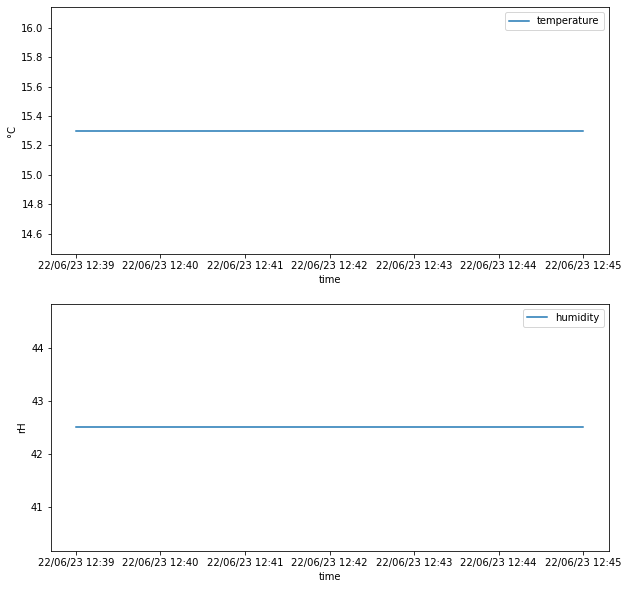

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from time import strftime
from datetime import datetime as dt


df = pd.read_csv('./data/TFWData.csv', index_col='time', parse_dates=True)
plt.figure(figsize=(10,10)) 
# umwandeln der timestamps im index in timestrings
index_as_timestrings = []
for t in df.index:
    index_as_timestrings.append(dt.fromtimestamp(t).strftime('%y/%m/%d %H:%M'))
df.index= index_as_timestrings
# temperatures
plt.subplot(211)
plt.plot(df.index,df.temp)
plt.legend(['temperature'])                
plt.xlabel('time') 
plt.ylabel('°C')

# moistures
plt.subplot(212)
plt.plot(df.index,df.hum)
plt.legend(['humidity'])
plt.xlabel('time') 
plt.ylabel('rH')

plt.show()